In [168]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [169]:
df = pd.read_excel("auto-mpg .xlsx")

In [170]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET


Drop Origin column

In [171]:
df.drop(columns=['origin'], inplace=True)

Find missing values and replace them with most appropiate option

In [172]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    2
model year      2
car name        0
CAR Number      7
dtype: int64

In [173]:
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
9,15,8,390.0,190,3850,8.5,70.0,amc ambassador dpl,NaN
21,24,4,107.0,90,2430,NaN,70.0,audi 100 ls,JH5673R
26,10,8,307.0,200,4376,15.0,70.0,chevy c20,NaN
29,27,4,97.0,88,2130,14.5,71.0,datsun pl510,NaN
32,25,4,98.0,80,2046,19.0,71.0,ford pinto,NaN
45,18,6,258.0,110,2962,13.5,NaN,amc hornet sportabout (sw),GTHY79
52,30,4,88.0,76,2065,14.5,71.0,fiat 124b,NaN
53,31,4,71.0,65,1773,NaN,71.0,toyota corolla 1200,T568G4
54,35,4,72.0,69,1613,18.0,71.0,datsun 1200,NaN
56,26,4,91.0,70,1955,20.5,NaN,plymouth cricket,TY6764


In [174]:
r1 = rows_with_nulls.loc[21]

In [175]:
# Deciding what to replace the NaN values with

In model year column, replace the NaN values with 71 since if you look at the data, you see how that column is ordered (from the top) in descending order and the elements are between or really close to the 71s

In [176]:
df['model year'].fillna(71, inplace=True)

In [158]:
# fig, ax = plt.subplots(figsize=(10, 6))
# sb.boxplot(data=df['acceleration'])

In [177]:
df[df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
9,15,8,390.0,190,3850,8.5,70.0,amc ambassador dpl,NaN
21,24,4,107.0,90,2430,NaN,70.0,audi 100 ls,JH5673R
26,10,8,307.0,200,4376,15.0,70.0,chevy c20,NaN
29,27,4,97.0,88,2130,14.5,71.0,datsun pl510,NaN
32,25,4,98.0,80,2046,19.0,71.0,ford pinto,NaN
52,30,4,88.0,76,2065,14.5,71.0,fiat 124b,NaN
53,31,4,71.0,65,1773,NaN,71.0,toyota corolla 1200,T568G4
54,35,4,72.0,69,1613,18.0,71.0,datsun 1200,NaN
73,13,8,307.0,130,4098,14.0,72.0,chevrolet chevelle concours (sw),NaN


(array([ 5., 11., 18., 19., 21.,  7.,  6.,  6.,  2.,  1.]),
 array([ 8.  ,  9.55, 11.1 , 12.65, 14.2 , 15.75, 17.3 , 18.85, 20.4 ,
        21.95, 23.5 ]),
 <BarContainer object of 10 artists>)

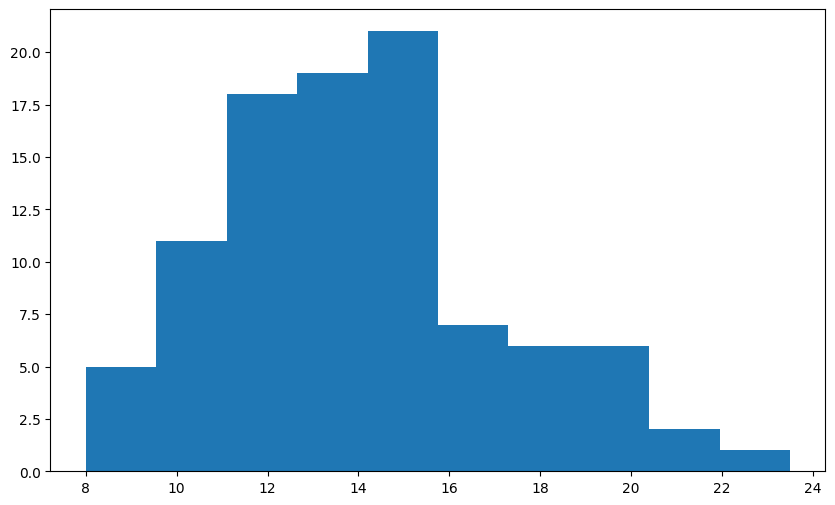

In [183]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(df['acceleration'])

In [195]:
df['acceleration'].sort_values().median()

14.0

In [198]:
df['acceleration'].fillna(df['acceleration'].mean(), inplace=True)

In [192]:
import scipy

In [200]:
scipy.stats.normaltest(df['acceleration'], nan_policy='omit')

NormaltestResult(statistic=4.33614013482718, pvalue=0.11439818478645539)

In [199]:
df[df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
9,15,8,390.0,190,3850,8.5,70.0,amc ambassador dpl,NaN
26,10,8,307.0,200,4376,15.0,70.0,chevy c20,NaN
29,27,4,97.0,88,2130,14.5,71.0,datsun pl510,NaN
32,25,4,98.0,80,2046,19.0,71.0,ford pinto,NaN
52,30,4,88.0,76,2065,14.5,71.0,fiat 124b,NaN
54,35,4,72.0,69,1613,18.0,71.0,datsun 1200,NaN
73,13,8,307.0,130,4098,14.0,72.0,chevrolet chevelle concours (sw),NaN
